In [1]:
import torch
import torch.nn as nn
import time

In [2]:
import gymnasium as gym

env = gym.make("ALE/Kaboom-v5", render_mode='rgb_array')
from nn_model_NatureCNN import DQNEfficientNet
model = DQNEfficientNet(env.action_space.n)

wei = torch.load("trains/model_1000.pth", weights_only=True)
model.load_state_dict(wei)


<All keys matched successfully>

In [31]:
model

DQNEfficientNet(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (fc): Sequential(
    (0): Linear(in_features=22528, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)

In [30]:
for param in model.parameters():
    print(f'number of parameters:{param.numel(): 12d} {param.shape}')

number of parameters:        6144 torch.Size([32, 3, 8, 8])
number of parameters:          32 torch.Size([32])
number of parameters:       32768 torch.Size([64, 32, 4, 4])
number of parameters:          64 torch.Size([64])
number of parameters:       36864 torch.Size([64, 64, 3, 3])
number of parameters:          64 torch.Size([64])
number of parameters:     5767168 torch.Size([256, 22528])
number of parameters:         256 torch.Size([256])
number of parameters:       32768 torch.Size([128, 256])
number of parameters:         128 torch.Size([128])
number of parameters:         512 torch.Size([4, 128])
number of parameters:           4 torch.Size([4])


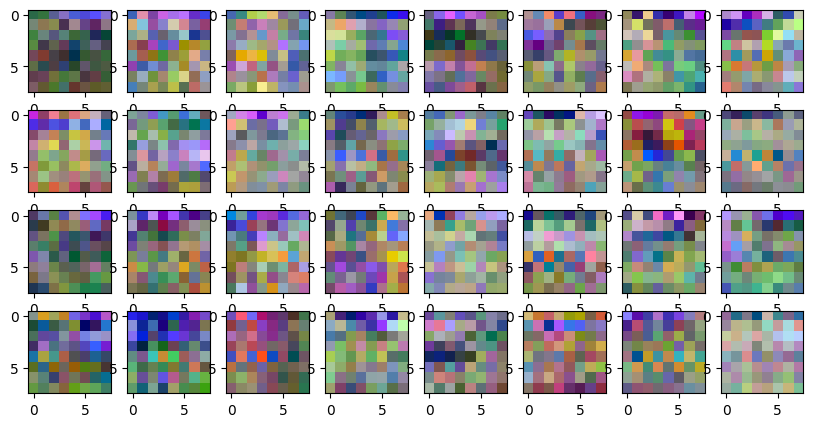

In [22]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(4,8,figsize=(10, 5))
for c in range(32):
    with torch.no_grad():
        max = model.features[0].weight[c].max().item()
        min = model.features[0].weight[c].min().item()
        img_norm = (model.features[0].weight[c].permute(1,2,0).numpy()-min)/(max - min)
        # print(max, min)
        axs[c//8][c%8].imshow(img_norm)

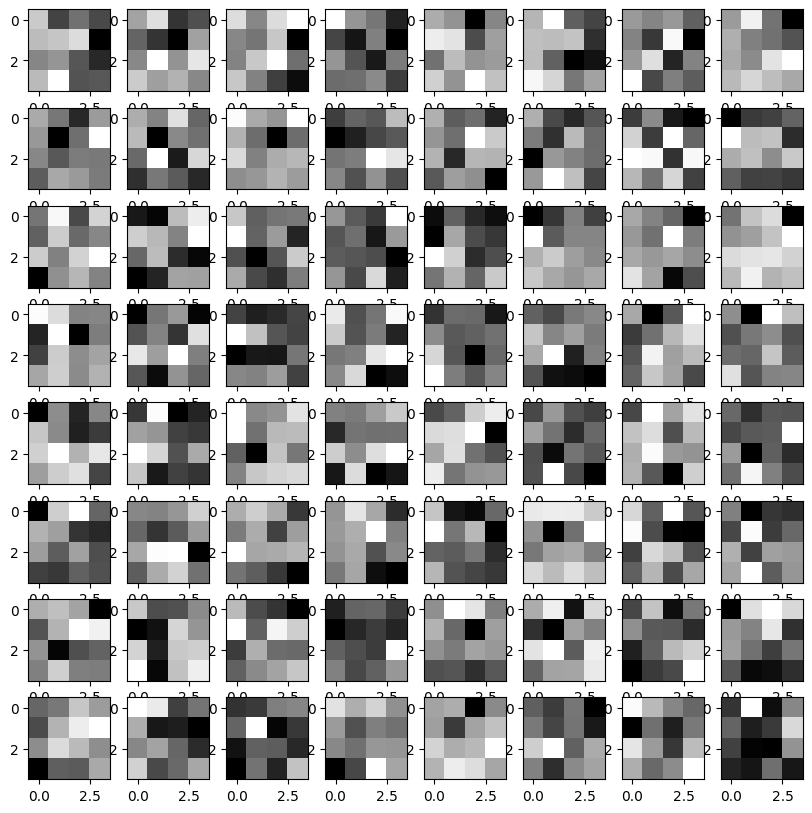

In [29]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(8,8,figsize=(10, 10))
input_channl = 1
for output_channel in range(64):
    with torch.no_grad():
        max = model.features[2].weight[output_channel][input_channl].max().item()
        min = model.features[2].weight[output_channel][input_channl].min().item()
        img_norm = (model.features[2].weight[output_channel][input_channl].unsqueeze(-1).numpy()-min)/(max - min)
        # print(max, min)
        axs[output_channel//8][output_channel%8].imshow(img_norm, cmap='gray')

In [16]:
import numpy as np
gym.spaces.Box(low=0, high=255, shape=(210, 160, 3), dtype=np.uint8).sample().transpose(2,0,1)[None].shape

(1, 3, 210, 160)